In [33]:
# Make a dataframe from all the "comparsions_*.csv" files in the current directory

import pandas as pd
import glob
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read in all the csv files where the name starts with "comparisons_"
path = os.getcwd()
files = glob.glob(os.path.join(path, "comparisons_*.csv"))
# Average the data from the different iterations in files into one dataframe
df = pd.concat((pd.read_csv(file) for file in files), axis = 0, ignore_index= True)

# Drop the column "Unnamed: 0" which is just the index
df = df.drop("Unnamed: 0", axis = 1)
df

,version,time (s),peak memory
0,"v2: no GPU, yes sparse",329.089627,506894122.0
1,"v3: yes GPU, no sparse",331.410505,601299262.0
2,"v4: yes GPU, yes sparse",NaN,NaN
3,"v2: no GPU, yes sparse",319.204179,506894122.0
4,"v3: yes GPU, no sparse",298.528863,506893183.0
5,"v4: yes GPU, yes sparse",84.816933,601299350.0
6,"v2: no GPU, yes sparse",345.053683,506892591.0
7,"v3: yes GPU, no sparse",338.778019,506893183.0
8,"v4: yes GPU, yes sparse",106.551161,601299966.0
9,"v2: no GPU, yes sparse",307.432018,506892611.0


In [34]:
# Add the following row into the dataframe: v1: no GPU, no sparse	2191.073928	60108964453
df = df.append({"version": "v1: no GPU, no sparse", "time (s)": 2191.073928, "peak memory": 60108964453}, ignore_index=True) 

# Add the following row into the dataframe: v1: no GPU, no sparse	3366.426885	60108963671
df = df.append({"version": "v1: no GPU, no sparse", "time (s)": 3366.426885, "peak memory": 60108963671}, ignore_index=True)

# Add the following row into the dataframe: v1: no GPU, no sparse	7654.909051	60108963956
df = df.append({"version": "v1: no GPU, no sparse", "time (s)": 7654.909051, "peak memory": 60108963956}, ignore_index=True)

# Add the following row into the dataframe: v1: no GPU, no sparse	3749.982634	60108964148
df = df.append({"version": "v1: no GPU, no sparse", "time (s)": 3749.982634, "peak memory": 60108964148}, ignore_index=True)

/tmp/ipykernel_67829/3120768904.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"version": "v1: no GPU, no sparse", "time (s)": 2191.073928, "peak memory": 60108964453}, ignore_index=True)
/tmp/ipykernel_67829/3120768904.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"version": "v1: no GPU, no sparse", "time (s)": 3366.426885, "peak memory": 60108963671}, ignore_index=True)
/tmp/ipykernel_67829/3120768904.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({"version": "v1: no GPU, no sparse", "time (s)": 7654.909051, "peak memory": 60108963956}, ignore_index=True)
/tmp/ipykernel_67829/3120768904.py:11: FutureWarning: The frame.append method is deprecated and will be re

/home/aparna/.local/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


(array([0, 1, 2, 3]),
 [Text(0, 0, 'v1: no GPU, no sparse'),
  Text(1, 0, 'v2: no GPU, yes sparse'),
  Text(2, 0, 'v3: yes GPU, no sparse'),
  Text(3, 0, 'v4: yes GPU, yes sparse')])

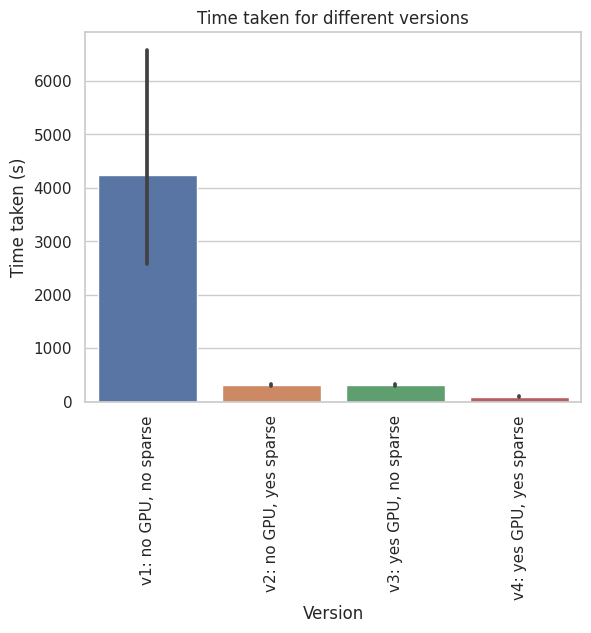

In [35]:
# Make a bar plot of the numbers 
# X axis is version and y axis is time 
ax = sns.barplot(x = "version", y = "time (s)", data = df, order = ["v1: no GPU, no sparse", "v2: no GPU, yes sparse", "v3: yes GPU, no sparse", "v4: yes GPU, yes sparse"])
# ax = sns.barplot(x = "version", y = "time (s)", data = df)
# Set the title
ax.set_title("Time taken for different versions")
# Set the labels for x and y axis
ax.set_xlabel("Version")
ax.set_ylabel("Time taken (s)")
# Turn the x axis labels by 45 degrees 
plt.xticks(rotation = 90)



/home/aparna/.local/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


(array([0, 1, 2, 3]),
 [Text(0, 0, 'v1: no GPU, no sparse'),
  Text(1, 0, 'v2: no GPU, yes sparse'),
  Text(2, 0, 'v3: yes GPU, no sparse'),
  Text(3, 0, 'v4: yes GPU, yes sparse')])

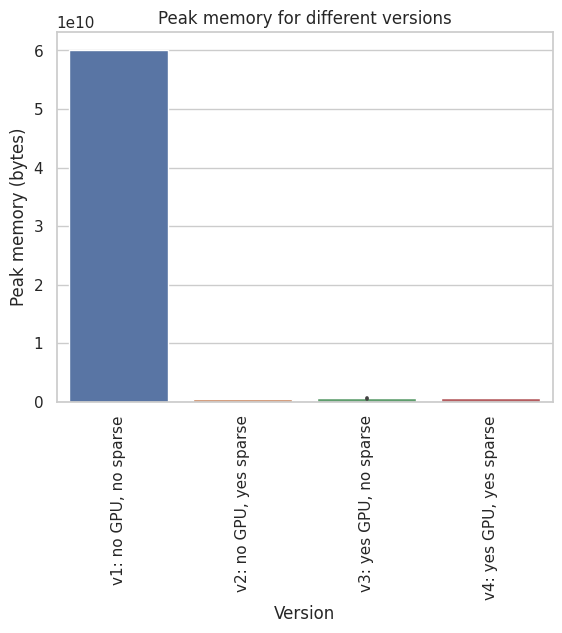

In [36]:
# Now do memory plot 

# Make a bar plot of the numbers
# X axis is version and y axis is memory
ax = sns.barplot(x = "version", y = "peak memory", data = df, order = ["v1: no GPU, no sparse", "v2: no GPU, yes sparse", "v3: yes GPU, no sparse", "v4: yes GPU, yes sparse"])
# Set the title
ax.set_title("Peak memory for different versions")
# Set the labels for x and y axis
ax.set_xlabel("Version")
ax.set_ylabel("Peak memory (bytes)")
# Turn the x axis labels by 45 degrees
plt.xticks(rotation = 90)



/home/aparna/.local/lib/python3.8/site-packages/seaborn/algorithms.py:98: RuntimeWarning: Mean of empty slice
  boot_dist.append(f(*sample, **func_kwargs))


(array([0, 1, 2]),
 [Text(0, 0, 'v2: no GPU, yes sparse'),
  Text(1, 0, 'v3: yes GPU, no sparse'),
  Text(2, 0, 'v4: yes GPU, yes sparse')])

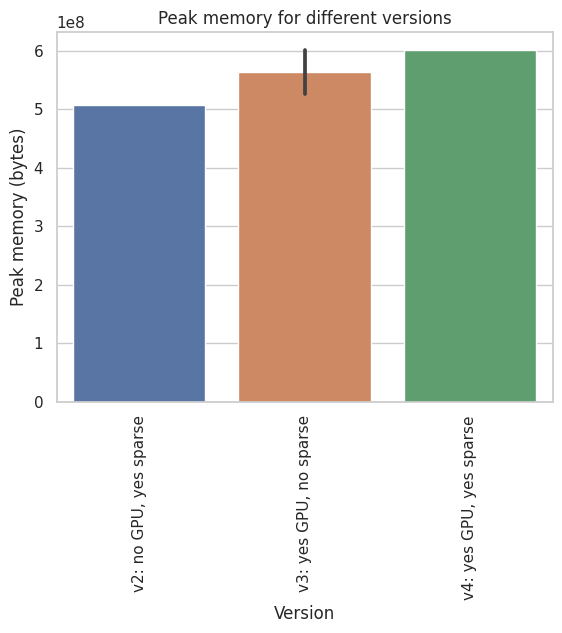

In [37]:
# Do memory plot again, but this time exclude v1 

# Make a bar plot of the numbers
# X axis is version and y axis is memory
ax = sns.barplot(x = "version", y = "peak memory", data = df, order = ["v2: no GPU, yes sparse", "v3: yes GPU, no sparse", "v4: yes GPU, yes sparse"])
# Set the title
ax.set_title("Peak memory for different versions")
# Set the labels for x and y axis
ax.set_xlabel("Version")
ax.set_ylabel("Peak memory (bytes)")
# Turn the x axis labels by 45 degrees
plt.xticks(rotation = 90)

